In [1]:
import numpy as np
import time
import torch
from torch import nn,optim
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append(r'F:\study\ml\python_packages')
import d2l

loading customized package : d2l 


In [3]:
def get_data_ch7():
    data = np.genfromtxt(
        r'F:\study\ml\DataSet\airfoil_self_noise\airfoil_self_noise.dat',
        delimiter='\t')
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    return torch.tensor(data[:1500, :-1], dtype=torch.float32),\
    torch.tensor(data[:1500,-1],dtype=torch.float32)

In [4]:
features,labels=get_data_ch7()
features.shape

torch.Size([1500, 5])

In [5]:
features[:5]

tensor([[-0.6620, -1.1464,  1.7993,  1.3129, -0.6448],
        [-0.5986, -1.1464,  1.7993,  1.3129, -0.6448],
        [-0.5192, -1.1464,  1.7993,  1.3129, -0.6448],
        [-0.4082, -1.1464,  1.7993,  1.3129, -0.6448],
        [-0.2813, -1.1464,  1.7993,  1.3129, -0.6448]])

In [6]:
a=np.array([[1,2],[3,4]])
a.mean(axis=0)

array([2., 3.])

In [7]:
def sgd(params,states,hyperparams,batch_size):
    for p in params:
        print('p.grad : ',p.grad.data)
        p.data -= hyperparams['lr'] * p.grad.data/batch_size

In [8]:
def linreg(x,w,b):
    return torch.mm(x,w)+b

In [9]:
def squared_loss(y_hat,y):
    return ((y_hat - y.view(y_hat.size()) )**2) /2

- dl/dw=dl/y * dy/dw
=2(y_hat-y) * x=2(xw+b-y)*x

- dl/db=dl/dy * dy/db
=2(y_hat-y) * 1=2(xw+b-y)


In [26]:
def train_ch7(optimizer_fn,
              states,
              hyperparams,
              features,
              labels,
              batch_size=10,
              num_epochs=2):
    net, loss = linreg, squared_loss
#     net, loss = linreg, nn.MSELoss()
    w = torch.nn.Parameter(torch.tensor(np.random.normal(
        0, 0.1, size=(features.shape[1], 1)),dtype=torch.float32),
                           requires_grad=True)
    b = torch.nn.Parameter(torch.zeros(1, dtype=torch.float32),
                           requires_grad=True)

    def eval_loss():
        return loss(net(features, w, b), labels).mean().item()/2
    
    def wx_grad(x,y,w,b,batch_size):
        return torch.mm(x.transpose(1,0),(torch.mm(x,w)+b-y.view(batch_size,1)) )*2 /1500/2

    ls = [eval_loss()]
    data_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
        features, labels),batch_size,shuffle=True)
    
#     optimizer=optimizer_fn(net.parameters(),**optimizer_hyperparams)
    for _ in range(num_epochs):
        start = time.time()
        for batch_i, (X, y) in enumerate(data_iter):
#             print('--------------------------------------')
#             print('wx_grad :',wx_grad(X,y,w,b,batch_size))
#             print('--------------------------------------')
            l = loss(net(X, w, b), y).mean()/2
#             l.backward()
#             optimizer_fn([w, b], hyperparams)
#             optimizer.step()
            print('l : ',l)
            print('eval l :',eval_loss())
            print('w grad type : ',type(w.grad))
            if w.grad is not None:
                print('---------grad zero--------------')
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
        
            optimizer_fn([w, b], states, hyperparams,batch_size)
            if (batch_i + 1) * batch_size % 100 == 0:
                ls.append(eval_loss())
    print('loss : %f ,%f sec per epoch' % (ls[-1], time.time() - start))
    plt.plot(np.linspace(0,num_epochs,len(ls)),ls)
    plt.xlabel('epoch')
    plt.ylabel('loss')

In [27]:
def train_sgd(lr,batch_size,num_epochs=2):
    train_ch7(sgd,None,{'lr':lr},features,labels,batch_size,num_epochs)

l :  tensor(0.2244, grad_fn=<DivBackward0>)
eval l : 0.22441796958446503
w grad type :  <class 'NoneType'>
p.grad :  tensor([[ 0.2114],
        [ 0.0582],
        [ 0.0818],
        [-0.0535],
        [ 0.1075]])
p.grad :  tensor([-0.0025])
l :  tensor(0.2244, grad_fn=<DivBackward0>)
eval l : 0.22437649965286255
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2114],
        [ 0.0582],
        [ 0.0818],
        [-0.0535],
        [ 0.1075]])
p.grad :  tensor([-0.0025])
l :  tensor(0.2243, grad_fn=<DivBackward0>)
eval l : 0.2243349850177765
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2113],
        [ 0.0582],
        [ 0.0817],
        [-0.0535],
        [ 0.1074]])
p.grad :  tensor([-0.0025])
l :  tensor(0.2243, grad_fn=<DivBackward0>)
eval l : 0.22429350018501282
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2113],
        [ 0.0582],
        [ 0.

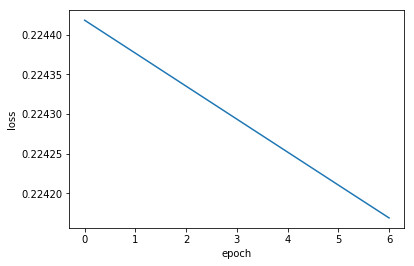

In [38]:
train_sgd(0.9,1500,6)

l :  tensor(1.5676, grad_fn=<DivBackward0>)
eval l : 0.27830952405929565
w grad type :  <class 'NoneType'>
p.grad :  tensor([[ 5.2098],
        [-1.4353],
        [ 0.2122],
        [ 0.3731],
        [-0.8965]])
p.grad :  tensor([1.2520])
l :  tensor(0.0662, grad_fn=<DivBackward0>)
eval l : 0.2709243893623352
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1703],
        [-0.0703],
        [ 0.2359],
        [-0.0767],
        [ 0.1114]])
p.grad :  tensor([-0.2573])
l :  tensor(0.2059, grad_fn=<DivBackward0>)
eval l : 0.2705117464065552
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.3796],
        [-0.9909],
        [ 0.4161],
        [ 0.3283],
        [-0.8749]])
p.grad :  tensor([-0.4538])
l :  tensor(0.0261, grad_fn=<DivBackward0>)
eval l : 0.2700166404247284
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.1069],
        [ 0.2898],
        [-0.191

eval l : 0.22653096914291382
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1790],
        [-0.1318],
        [-0.0424],
        [ 0.1809],
        [-0.2319]])
p.grad :  tensor([-0.2501])
l :  tensor(0.6709, grad_fn=<DivBackward0>)
eval l : 0.22647495567798615
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.1004],
        [ 0.7639],
        [-0.3061],
        [-1.0082],
        [ 1.9151]])
p.grad :  tensor([0.8191])
l :  tensor(0.3722, grad_fn=<DivBackward0>)
eval l : 0.22577735781669617
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.3168],
        [-0.2803],
        [ 0.7252],
        [ 0.7509],
        [ 0.3029]])
p.grad :  tensor([-0.6101])
l :  tensor(0.7275, grad_fn=<DivBackward0>)
eval l : 0.22467124462127686
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.9239],
        [-0.5453],
        [ 1.5347],


p.grad :  tensor([[-0.0614],
        [-0.0983],
        [-0.0321],
        [ 0.0256],
        [-0.0641]])
p.grad :  tensor([0.0858])
l :  tensor(0.6044, grad_fn=<DivBackward0>)
eval l : 0.20008714497089386
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.4654],
        [ 0.0108],
        [ 0.2906],
        [-0.2317],
        [ 0.3505]])
p.grad :  tensor([-0.7774])
l :  tensor(0.0009, grad_fn=<DivBackward0>)
eval l : 0.1994573175907135
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0917],
        [ 0.0345],
        [ 0.0276],
        [ 0.0217],
        [ 0.0237]])
p.grad :  tensor([-0.0301])
l :  tensor(0.9113, grad_fn=<DivBackward0>)
eval l : 0.19950170814990997
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.6402],
        [ 0.8903],
        [-0.3568],
        [-0.6905],
        [ 2.1558]])
p.grad :  tensor([0.9546])
l :  tensor(0.1347, grad_fn=<DivBac

l :  tensor(0.0369, grad_fn=<DivBackward0>)
eval l : 0.1725815385580063
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1374],
        [-0.2796],
        [ 0.1760],
        [-0.2520],
        [-0.2232]])
p.grad :  tensor([-0.1920])
l :  tensor(0.1522, grad_fn=<DivBackward0>)
eval l : 0.1726246476173401
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.1592],
        [ 0.3639],
        [-0.1458],
        [-0.4802],
        [ 0.9122]])
p.grad :  tensor([0.3901])
l :  tensor(0.3111, grad_fn=<DivBackward0>)
eval l : 0.17260056734085083
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 1.7016],
        [-0.6395],
        [ 0.0946],
        [ 0.7324],
        [-0.4048]])
p.grad :  tensor([0.5578])
l :  tensor(0.5046, grad_fn=<DivBackward0>)
eval l : 0.17135359346866608
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.5379

l :  tensor(0.0004, grad_fn=<DivBackward0>)
eval l : 0.1635022759437561
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0158],
        [-0.0283],
        [ 0.0178],
        [-0.0058],
        [-0.0237]])
p.grad :  tensor([-0.0194])
l :  tensor(0.1913, grad_fn=<DivBackward0>)
eval l : 0.1634988635778427
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1546],
        [-0.1022],
        [ 0.0741],
        [-0.5383],
        [-0.1958]])
p.grad :  tensor([0.4374])
l :  tensor(0.0284, grad_fn=<DivBackward0>)
eval l : 0.1636473536491394
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0596],
        [ 0.2455],
        [-0.1546],
        [ 0.0502],
        [ 0.2058]])
p.grad :  tensor([0.1686])
l :  tensor(0.5182, grad_fn=<DivBackward0>)
eval l : 0.1635439395904541
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.7797],

w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0427],
        [ 0.1246],
        [-0.1301],
        [-0.2519],
        [ 0.0350]])
p.grad :  tensor([0.3482])
l :  tensor(0.0316, grad_fn=<DivBackward0>)
eval l : 0.15049497783184052
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0629],
        [-0.0817],
        [ 0.2114],
        [ 0.2189],
        [ 0.0883]])
p.grad :  tensor([-0.1779])
l :  tensor(0.0304, grad_fn=<DivBackward0>)
eval l : 0.15041311085224152
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1154],
        [ 0.0820],
        [-0.1715],
        [-0.2288],
        [ 0.0946]])
p.grad :  tensor([-0.1743])
l :  tensor(0.0136, grad_fn=<DivBackward0>)
eval l : 0.15042893588542938
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0606],
        [-0.1337],
        [ 0.2099],
        [ 0.1531],
        [-

p.grad :  tensor([-0.8014])
l :  tensor(0.0161, grad_fn=<DivBackward0>)
eval l : 0.14264708757400513
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0841],
        [ 0.1456],
        [-0.2285],
        [-0.0378],
        [ 0.0803]])
p.grad :  tensor([-0.1270])
l :  tensor(0.0063, grad_fn=<DivBackward0>)
eval l : 0.14268936216831207
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0097],
        [-0.0906],
        [ 0.1423],
        [ 0.0236],
        [-0.0500]])
p.grad :  tensor([0.0791])
l :  tensor(0.0531, grad_fn=<DivBackward0>)
eval l : 0.1426391750574112
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.7029],
        [ 0.0772],
        [ 0.2739],
        [-0.3025],
        [ 0.1804]])
p.grad :  tensor([-0.2304])
l :  tensor(0.0951, grad_fn=<DivBackward0>)
eval l : 0.14298522472381592
w grad type :  <class 'torch.Tensor'>
---------grad zero-----------

p.grad :  tensor([-0.5800])
l :  tensor(0.0011, grad_fn=<DivBackward0>)
eval l : 0.13471558690071106
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0251],
        [ 0.0156],
        [-0.0327],
        [-0.0099],
        [ 0.0173]])
p.grad :  tensor([-0.0332])
l :  tensor(0.0662, grad_fn=<DivBackward0>)
eval l : 0.1347123384475708
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0215],
        [ 0.2950],
        [ 0.0962],
        [ 0.1861],
        [ 0.1894]])
p.grad :  tensor([-0.2573])
l :  tensor(0.1071, grad_fn=<DivBackward0>)
eval l : 0.13466876745224
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2790],
        [-0.3052],
        [ 0.1223],
        [ 0.4028],
        [-0.7651]])
p.grad :  tensor([-0.3273])
l :  tensor(0.1455, grad_fn=<DivBackward0>)
eval l : 0.13460417091846466
w grad type :  <class 'torch.Tensor'>
---------grad zero-------------

l :  tensor(0.1621, grad_fn=<DivBackward0>)
eval l : 0.1321094036102295
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2665],
        [ 0.2574],
        [-0.7243],
        [ 0.4955],
        [ 0.1790]])
p.grad :  tensor([-0.4026])
l :  tensor(0.0015, grad_fn=<DivBackward0>)
eval l : 0.13224458694458008
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0888],
        [-0.0451],
        [-0.0361],
        [-0.0484],
        [-0.0309]])
p.grad :  tensor([0.0393])
l :  tensor(0.0236, grad_fn=<DivBackward0>)
eval l : 0.13220937550067902
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2492],
        [-0.1761],
        [ 0.0260],
        [ 0.0458],
        [-0.1100]])
p.grad :  tensor([0.1536])
l :  tensor(0.0811, grad_fn=<DivBackward0>)
eval l : 0.1320757120847702
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.8689

p.grad :  tensor([-0.2508])
l :  tensor(0.0922, grad_fn=<DivBackward0>)
eval l : 0.1267503947019577
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[0.0372],
        [0.3482],
        [0.1135],
        [0.2197],
        [0.2236]])
p.grad :  tensor([-0.3037])
l :  tensor(0.0073, grad_fn=<DivBackward0>)
eval l : 0.12671133875846863
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0698],
        [-0.0012],
        [-0.0320],
        [-0.1053],
        [-0.0339]])
p.grad :  tensor([0.0856])
l :  tensor(0.0037, grad_fn=<DivBackward0>)
eval l : 0.12673668563365936
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0216],
        [ 0.0702],
        [ 0.0229],
        [ 0.0443],
        [ 0.0451]])
p.grad :  tensor([-0.0612])
l :  tensor(1.5451, grad_fn=<DivBackward0>)
eval l : 0.12673626840114594
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p

w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0838],
        [ 0.1066],
        [-0.1113],
        [ 0.3910],
        [-0.0188]])
p.grad :  tensor([0.2978])
l :  tensor(0.0052, grad_fn=<DivBackward0>)
eval l : 0.12500813603401184
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0376],
        [-0.0675],
        [ 0.0271],
        [ 0.0524],
        [-0.1636]])
p.grad :  tensor([-0.0724])
l :  tensor(0.2431, grad_fn=<DivBackward0>)
eval l : 0.12500789761543274
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-2.0518],
        [ 0.1652],
        [ 0.5861],
        [-0.1469],
        [ 0.3851]])
p.grad :  tensor([-0.4931])
l :  tensor(0.0428, grad_fn=<DivBackward0>)
eval l : 0.1254657357931137
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1387],
        [-0.1672],
        [ 0.2036],
        [-0.2546],
        [-0

w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0338],
        [ 0.1379],
        [ 0.0449],
        [-0.0358],
        [ 0.0898]])
p.grad :  tensor([-0.1203])
l :  tensor(0.0475, grad_fn=<DivBackward0>)
eval l : 0.12470412999391556
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.4920],
        [ 0.2499],
        [ 0.1999],
        [ 0.1577],
        [ 0.1716]])
p.grad :  tensor([-0.2180])
l :  tensor(0.0213, grad_fn=<DivBackward0>)
eval l : 0.12482424080371857
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0122],
        [-0.0934],
        [ 0.2628],
        [ 0.1917],
        [-0.0765]])
p.grad :  tensor([0.1460])
l :  tensor(0.0640, grad_fn=<DivBackward0>)
eval l : 0.12480409443378448
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.5711],
        [-0.2259],
        [ 0.4552],
        [ 0.3322],
        [-

l :  tensor(0.0441, grad_fn=<DivBackward0>)
eval l : 0.12372589856386185
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0258],
        [ 0.4587],
        [-0.1927],
        [-0.1520],
        [ 0.4050]])
p.grad :  tensor([0.2101])
l :  tensor(0.0615, grad_fn=<DivBackward0>)
eval l : 0.12369631230831146
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0304],
        [-0.1140],
        [ 0.2949],
        [ 0.1795],
        [ 0.1253]])
p.grad :  tensor([-0.2481])
l :  tensor(0.0131, grad_fn=<DivBackward0>)
eval l : 0.12366704642772675
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.1240],
        [-0.1145],
        [ 0.1361],
        [-0.1503],
        [-0.0091]])
p.grad :  tensor([-0.1145])
l :  tensor(0.0020, grad_fn=<DivBackward0>)
eval l : 0.12365246564149857
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0

eval l : 0.1241031065583229
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1869],
        [-0.1376],
        [-0.0443],
        [-0.3427],
        [-0.1620]])
p.grad :  tensor([-0.2610])
l :  tensor(0.0033, grad_fn=<DivBackward0>)
eval l : 0.1240646094083786
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0203],
        [ 0.0659],
        [ 0.0215],
        [-0.0171],
        [ 0.0429]])
p.grad :  tensor([-0.0574])
l :  tensor(0.3734, grad_fn=<DivBackward0>)
eval l : 0.12406571209430695
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.5112],
        [ 1.0967],
        [-0.7263],
        [-0.7521],
        [ 0.3032]])
p.grad :  tensor([0.6111])
l :  tensor(0.0994, grad_fn=<DivBackward0>)
eval l : 0.12416892498731613
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2115],
        [-0.3615],
        [ 0.5673],
  

---------grad zero--------------
p.grad :  tensor([[ 0.0011],
        [ 0.0018],
        [-0.0049],
        [-0.0008],
        [ 0.0014]])
p.grad :  tensor([-0.0027])
l :  tensor(0.0657, grad_fn=<DivBackward0>)
eval l : 0.12461421638727188
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1535],
        [ 0.2940],
        [-0.2524],
        [ 0.1855],
        [ 0.1678]])
p.grad :  tensor([-0.2564])
l :  tensor(0.0225, grad_fn=<DivBackward0>)
eval l : 0.12464233487844467
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0992],
        [-0.1474],
        [-0.0254],
        [-0.1968],
        [-0.4239]])
p.grad :  tensor([-0.1499])
l :  tensor(0.0727, grad_fn=<DivBackward0>)
eval l : 0.12464840710163116
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.1930],
        [-0.3090],
        [-0.1007],
        [-0.3318],
        [-0.1976]])
p.grad :  tensor([0.2695])


l :  tensor(0.1616, grad_fn=<DivBackward0>)
eval l : 0.12478724122047424
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0336],
        [ 0.1755],
        [ 0.3686],
        [ 0.2908],
        [ 0.2940]])
p.grad :  tensor([-0.4020])
l :  tensor(0.0112, grad_fn=<DivBackward0>)
eval l : 0.12468628585338593
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0551],
        [-0.0487],
        [ 0.1260],
        [-0.0316],
        [ 0.0549]])
p.grad :  tensor([-0.1060])
l :  tensor(0.0123, grad_fn=<DivBackward0>)
eval l : 0.1246805340051651
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0577],
        [-0.1274],
        [-0.1019],
        [-0.1368],
        [-0.0873]])
p.grad :  tensor([0.1111])
l :  tensor(0.0095, grad_fn=<DivBackward0>)
eval l : 0.12472257763147354
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.03

l :  tensor(0.7093, grad_fn=<DivBackward0>)
eval l : 0.12387733161449432
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.6871],
        [-1.2552],
        [ 0.3148],
        [-1.1057],
        [-2.0876]])
p.grad :  tensor([-0.8422])
l :  tensor(0.0419, grad_fn=<DivBackward0>)
eval l : 0.12370336800813675
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0576],
        [-0.3673],
        [ 0.2433],
        [ 0.1480],
        [-0.0947]])
p.grad :  tensor([-0.2047])
l :  tensor(0.2664, grad_fn=<DivBackward0>)
eval l : 0.12367595732212067
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.5590],
        [ 0.1847],
        [-0.1929],
        [-0.3733],
        [ 0.0518]])
p.grad :  tensor([0.5161])
l :  tensor(0.3198, grad_fn=<DivBackward0>)
eval l : 0.1236213818192482
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-2.35

l :  tensor(0.4778, grad_fn=<DivBackward0>)
eval l : 0.12333116680383682
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.5453],
        [ 0.1890],
        [-0.6338],
        [-0.5000],
        [-0.2880]])
p.grad :  tensor([0.6912])
l :  tensor(0.0181, grad_fn=<DivBackward0>)
eval l : 0.12348273396492004
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0902],
        [ 0.2415],
        [-0.1599],
        [-0.1656],
        [ 0.0668]])
p.grad :  tensor([0.1346])
l :  tensor(0.0078, grad_fn=<DivBackward0>)
eval l : 0.12347880750894547
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0359],
        [-0.0866],
        [-0.0149],
        [-0.1156],
        [-0.2491]])
p.grad :  tensor([-0.0881])
l :  tensor(0.0265, grad_fn=<DivBackward0>)
eval l : 0.12346050143241882
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.09

eval l : 0.12571246922016144
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0727],
        [-0.0769],
        [ 0.0114],
        [ 0.0881],
        [-0.0487]])
p.grad :  tensor([0.0671])
l :  tensor(0.1448, grad_fn=<DivBackward0>)
eval l : 0.12568244338035583
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[0.1976],
        [0.2240],
        [0.1422],
        [0.4683],
        [0.2497]])
p.grad :  tensor([-0.3805])
l :  tensor(0.2115, grad_fn=<DivBackward0>)
eval l : 0.12570329010486603
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.3629],
        [ 0.1152],
        [-0.4528],
        [ 0.3327],
        [ 0.1748]])
p.grad :  tensor([-0.4599])
l :  tensor(0.0268, grad_fn=<DivBackward0>)
eval l : 0.12570050358772278
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[0.0850],
        [0.0023],
        [0.0612],
        

l :  tensor(0.0027, grad_fn=<DivBackward0>)
eval l : 0.12216224521398544
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0391],
        [-0.0752],
        [ 0.0473],
        [ 0.0635],
        [-0.0700]])
p.grad :  tensor([-0.0516])
l :  tensor(1.0230, grad_fn=<DivBackward0>)
eval l : 0.12216570228338242
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.6696],
        [-2.6359],
        [ 1.2022],
        [ 0.7316],
        [-0.9050]])
p.grad :  tensor([-1.0115])
l :  tensor(0.0283, grad_fn=<DivBackward0>)
eval l : 0.1224474310874939
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2728],
        [-0.1160],
        [ 0.0285],
        [ 0.2207],
        [-0.1113]])
p.grad :  tensor([0.1681])
l :  tensor(0.8818, grad_fn=<DivBackward0>)
eval l : 0.12245611846446991
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.74

l :  tensor(0.2259, grad_fn=<DivBackward0>)
eval l : 0.12323964387178421
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.7711],
        [-0.2235],
        [ 0.4678],
        [ 0.6240],
        [-0.2579]])
p.grad :  tensor([0.4752])
l :  tensor(0.0002, grad_fn=<DivBackward0>)
eval l : 0.12337911874055862
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0064],
        [-0.0142],
        [ 0.0021],
        [ 0.0037],
        [-0.0089]])
p.grad :  tensor([0.0124])
l :  tensor(0.5071, grad_fn=<DivBackward0>)
eval l : 0.12338382005691528
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[0.2516],
        [0.7003],
        [0.1207],
        [0.9349],
        [2.0138]])
p.grad :  tensor([0.7121])
l :  tensor(0.0741, grad_fn=<DivBackward0>)
eval l : 0.12289699167013168
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1949],
 

eval l : 0.12161233276128769
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.2895],
        [-0.1628],
        [ 0.3407],
        [-0.4260],
        [-0.1593]])
p.grad :  tensor([0.3461])
l :  tensor(0.0669, grad_fn=<DivBackward0>)
eval l : 0.12165073305368423
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.5836],
        [-0.2964],
        [-0.0966],
        [-0.3182],
        [-0.1896]])
p.grad :  tensor([0.2586])
l :  tensor(0.0882, grad_fn=<DivBackward0>)
eval l : 0.12163610756397247
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1542],
        [ 0.2401],
        [-0.2924],
        [ 0.3655],
        [ 0.1675]])
p.grad :  tensor([-0.2970])
l :  tensor(0.0200, grad_fn=<DivBackward0>)
eval l : 0.12160228192806244
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1071],
        [ 0.0904],
        [-0.2545],
 

eval l : 0.12164293229579926
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1263],
        [-0.1005],
        [-0.0323],
        [-0.2504],
        [-0.1184]])
p.grad :  tensor([-0.1907])
l :  tensor(0.1195, grad_fn=<DivBackward0>)
eval l : 0.1216287836432457
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0424],
        [-0.1588],
        [ 0.4109],
        [-0.4538],
        [ 0.1823]])
p.grad :  tensor([-0.3457])
l :  tensor(0.1504, grad_fn=<DivBackward0>)
eval l : 0.12162468582391739
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.2601],
        [ 0.4446],
        [ 0.4610],
        [-0.1156],
        [ 0.3165]])
p.grad :  tensor([-0.3879])
l :  tensor(0.0004, grad_fn=<DivBackward0>)
eval l : 0.12162021547555923
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0080],
        [-0.0174],
        [ 0.0351],


p.grad :  tensor([0.1449])
l :  tensor(0.1593, grad_fn=<DivBackward0>)
eval l : 0.12223223596811295
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2642],
        [ 0.0933],
        [-0.0677],
        [ 0.2887],
        [ 0.1910]])
p.grad :  tensor([-0.3992])
l :  tensor(0.3923, grad_fn=<DivBackward0>)
eval l : 0.12222270667552948
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.4485],
        [-0.2242],
        [ 0.2341],
        [-0.8224],
        [ 0.0396]])
p.grad :  tensor([-0.6264])
l :  tensor(0.0450, grad_fn=<DivBackward0>)
eval l : 0.12210547924041748
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2298],
        [-0.2432],
        [ 0.2088],
        [-0.2611],
        [-0.1358]])
p.grad :  tensor([0.2121])
l :  tensor(0.0020, grad_fn=<DivBackward0>)
eval l : 0.12205148488283157
w grad type :  <class 'torch.Tensor'>
---------grad zero-----------

---------grad zero--------------
p.grad :  tensor([[ 0.0442],
        [ 0.0342],
        [-0.1147],
        [ 0.1643],
        [-0.0556]])
p.grad :  tensor([0.1251])
l :  tensor(0.0699, grad_fn=<DivBackward0>)
eval l : 0.12148395925760269
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.1373],
        [-0.3032],
        [-0.0988],
        [ 0.3472],
        [-0.1997]])
p.grad :  tensor([0.2644])
l :  tensor(0.0424, grad_fn=<DivBackward0>)
eval l : 0.12149479240179062
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0840],
        [ 0.1211],
        [ 0.0769],
        [-0.0613],
        [ 0.1398]])
p.grad :  tensor([-0.2058])
l :  tensor(0.0713, grad_fn=<DivBackward0>)
eval l : 0.12149588018655777
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0944],
        [-0.1227],
        [ 0.3174],
        [-0.0796],
        [ 0.1384]])
p.grad :  tensor([-0.2671])
l

l :  tensor(0.0024, grad_fn=<DivBackward0>)
eval l : 0.12262134999036789
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0295],
        [ 0.0460],
        [-0.0184],
        [-0.0607],
        [ 0.1153]])
p.grad :  tensor([0.0493])
l :  tensor(0.1416, grad_fn=<DivBackward0>)
eval l : 0.12258992344141006
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.6105],
        [ 0.5481],
        [-0.3450],
        [ 0.4940],
        [ 0.4376]])
p.grad :  tensor([0.3763])
l :  tensor(0.0068, grad_fn=<DivBackward0>)
eval l : 0.12251629680395126
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0895],
        [-0.0948],
        [ 0.0140],
        [-0.0598],
        [-0.0579]])
p.grad :  tensor([0.0827])
l :  tensor(0.0954, grad_fn=<DivBackward0>)
eval l : 0.1225440502166748
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2339

l :  tensor(0.0213, grad_fn=<DivBackward0>)
eval l : 0.12222816050052643
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0965],
        [ 0.0686],
        [-0.1435],
        [-0.1914],
        [ 0.0791]])
p.grad :  tensor([-0.1458])
l :  tensor(0.0021, grad_fn=<DivBackward0>)
eval l : 0.12223120033740997
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0737],
        [-0.0521],
        [ 0.0817],
        [-0.0328],
        [-0.0278]])
p.grad :  tensor([0.0454])
l :  tensor(0.0117, grad_fn=<DivBackward0>)
eval l : 0.12223552167415619
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0716],
        [-0.1240],
        [ 0.1946],
        [ 0.1420],
        [-0.0697]])
p.grad :  tensor([0.1082])
l :  tensor(0.0054, grad_fn=<DivBackward0>)
eval l : 0.1222405880689621
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.009

p.grad :  tensor([[-0.0639],
        [ 0.2074],
        [ 0.1659],
        [-0.2375],
        [ 0.1431]])
p.grad :  tensor([-0.1809])
l :  tensor(0.0066, grad_fn=<DivBackward0>)
eval l : 0.12269308418035507
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.1315],
        [ 0.0929],
        [ 0.0303],
        [-0.0242],
        [ 0.0606]])
p.grad :  tensor([-0.0811])
l :  tensor(0.0015, grad_fn=<DivBackward0>)
eval l : 0.12265663594007492
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0137],
        [ 0.0565],
        [-0.0356],
        [ 0.0509],
        [ 0.0451]])
p.grad :  tensor([0.0388])
l :  tensor(0.3371, grad_fn=<DivBackward0>)
eval l : 0.1226421371102333
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0712],
        [ 0.5415],
        [-0.2170],
        [-0.7146],
        [ 1.3574]])
p.grad :  tensor([0.5806])
l :  tensor(0.1383, grad_fn=<DivBac

l :  tensor(0.0394, grad_fn=<DivBackward0>)
eval l : 0.12193264812231064
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0243],
        [-0.0464],
        [ 0.0337],
        [ 0.0592],
        [-0.1028]])
p.grad :  tensor([0.1986])
l :  tensor(0.2291, grad_fn=<DivBackward0>)
eval l : 0.12193978577852249
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2485],
        [ 0.0067],
        [ 0.1789],
        [-0.6284],
        [ 0.2314]])
p.grad :  tensor([-0.4786])
l :  tensor(0.0627, grad_fn=<DivBackward0>)
eval l : 0.12194039672613144
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0885],
        [ 0.2336],
        [-0.0936],
        [ 0.3288],
        [ 0.4313]])
p.grad :  tensor([0.2505])
l :  tensor(0.2995, grad_fn=<DivBackward0>)
eval l : 0.12187676131725311
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 1.23

p.grad :  tensor([-0.9172])
l :  tensor(0.0002, grad_fn=<DivBackward0>)
eval l : 0.1218450590968132
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0054],
        [-0.0151],
        [ 0.0130],
        [-0.0162],
        [-0.0084]])
p.grad :  tensor([0.0132])
l :  tensor(0.0338, grad_fn=<DivBackward0>)
eval l : 0.12184173613786697
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1991],
        [-0.1486],
        [ 0.1809],
        [ 0.0548],
        [-0.1119]])
p.grad :  tensor([0.1838])
l :  tensor(0.0716, grad_fn=<DivBackward0>)
eval l : 0.12180968374013901
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.1916],
        [ 0.1229],
        [-0.3181],
        [-0.1936],
        [-0.1352]])
p.grad :  tensor([0.2676])
l :  tensor(0.0093, grad_fn=<DivBackward0>)
eval l : 0.12183839082717896
w grad type :  <class 'torch.Tensor'>
---------grad zero-------------

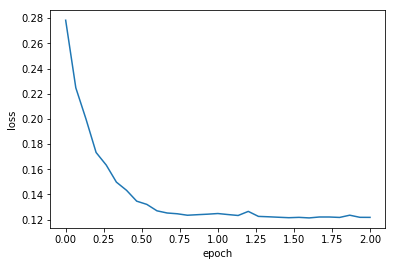

In [31]:
train_sgd(0.005,1)

l :  tensor(0.1810, grad_fn=<DivBackward0>)
eval l : 0.24563413858413696
w grad type :  <class 'NoneType'>
p.grad :  tensor([[ 0.1320],
        [ 0.1564],
        [ 0.0911],
        [-0.1232],
        [ 0.0520]])
p.grad :  tensor([0.0387])
l :  tensor(0.2031, grad_fn=<DivBackward0>)
eval l : 0.2417265772819519
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.3641],
        [-0.0087],
        [ 0.0661],
        [-0.0563],
        [ 0.0015]])
p.grad :  tensor([0.1898])
l :  tensor(0.4314, grad_fn=<DivBackward0>)
eval l : 0.2366458922624588
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.3297],
        [ 0.0955],
        [ 0.3321],
        [-0.1520],
        [ 0.2612]])
p.grad :  tensor([0.1121])
l :  tensor(0.1498, grad_fn=<DivBackward0>)
eval l : 0.22741548717021942
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2605],
        [-0.1918],
        [ 0.2952

p.grad :  tensor([-0.0453])
l :  tensor(0.1151, grad_fn=<DivBackward0>)
eval l : 0.12830187380313873
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.2542],
        [-0.0472],
        [ 0.0353],
        [ 0.0948],
        [-0.1158]])
p.grad :  tensor([0.0352])
l :  tensor(0.0465, grad_fn=<DivBackward0>)
eval l : 0.1291780173778534
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1415],
        [ 0.0647],
        [ 0.0446],
        [-0.0161],
        [ 0.1584]])
p.grad :  tensor([0.1437])
l :  tensor(0.1136, grad_fn=<DivBackward0>)
eval l : 0.12869957089424133
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1463],
        [-0.0805],
        [-0.0577],
        [ 0.0381],
        [-0.1314]])
p.grad :  tensor([-0.0653])
l :  tensor(0.1149, grad_fn=<DivBackward0>)
eval l : 0.12977057695388794
w grad type :  <class 'torch.Tensor'>
---------grad zero------------

w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1661],
        [ 0.0987],
        [-0.1973],
        [ 0.2316],
        [ 0.1150]])
p.grad :  tensor([-0.1819])
l :  tensor(0.1392, grad_fn=<DivBackward0>)
eval l : 0.12269062548875809
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.1892],
        [-0.0711],
        [ 0.1114],
        [-0.0254],
        [-0.0763]])
p.grad :  tensor([-0.0609])
l :  tensor(0.0891, grad_fn=<DivBackward0>)
eval l : 0.12297322601079941
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0039],
        [ 0.0687],
        [ 0.0763],
        [-0.0692],
        [ 0.0508]])
p.grad :  tensor([0.0578])
l :  tensor(0.0516, grad_fn=<DivBackward0>)
eval l : 0.1227617934346199
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.0170],
        [-0.0050],
        [-0.0240],
        [-0.0405],
        [-0

l :  tensor(0.1835, grad_fn=<DivBackward0>)
eval l : 0.1215367317199707
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[-0.1693],
        [ 0.0048],
        [ 0.1589],
        [ 0.0292],
        [ 0.0349]])
p.grad :  tensor([-0.2157])
l :  tensor(0.1645, grad_fn=<DivBackward0>)
eval l : 0.12162872403860092
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0770],
        [-0.0527],
        [-0.0283],
        [-0.0475],
        [-0.0118]])
p.grad :  tensor([0.3215])
l :  tensor(0.0996, grad_fn=<DivBackward0>)
eval l : 0.12154973298311234
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.0955],
        [ 0.0004],
        [ 0.0046],
        [-0.0914],
        [ 0.1191]])
p.grad :  tensor([-0.0488])
l :  tensor(0.1758, grad_fn=<DivBackward0>)
eval l : 0.12148579210042953
w grad type :  <class 'torch.Tensor'>
---------grad zero--------------
p.grad :  tensor([[ 0.12

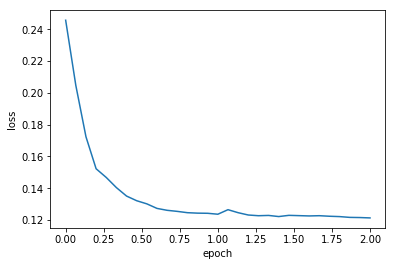

In [37]:
train_sgd(0.65,10)

In [ ]:
data_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
    features, labels),10,shuffle=True)

In [ ]:
for x,y in data_iter:
    print(x)
    print(y)
    break

In [ ]:
def train_pytorch_ch71(optimizer_fn,optimizer_hyperparams,features,labels,batch_size=10,
                     num_epochs=2):
    net=nn.Sequential(
        nn.Linear(features.shape[-1],1)
    )
    loss=nn.MSELoss()
    optimizer=optimizer_fn(net.parameters(),**optimizer_hyperparams)
    
    def eval_loss():
        return loss(net(features).view(-1),labels).item()/2
    ls=[eval_loss()]
    data_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
        features, labels),batch_size,shuffle=True)
    
    for _ in range(num_epochs):
        start=time.time()
        for batch_i,(X,y) in enumerate(data_iter):
            l=loss(net(X).view(-1),y)/2
            
            optimizer.zero_grad()
            l.backward()
#             print('----------------------------')
#             for i in net.parameters():
#                 print(i.grad.data)
#             print('----------------------------')
            optimizer.step()
            if (batch_i + 1) * batch_size % 100 ==0:
                ls.append(eval_loss())
    print('loss : %f ,%f sec per epoch' % (ls[-1], time.time() - start))
    plt.plot(np.linspace(0, num_epochs, len(ls)), ls)
    plt.xlabel('epoch')
    plt.ylabel('loss')

In [ ]:
 train_pytorch_ch71(optim.SGD, {"lr": 1.0}, features, labels, 1500,6)

In [ ]:
 train_pytorch_ch71(optim.SGD, {"lr": 0.05}, features, labels, 10)